In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [5]:
file_path = "/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_loss/2024_행정구역별 개황.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도,행정구역,구분,학제,학교수,학교수.1,학과수,재적학생수,재적학생수.1,재적학생수.2,...,입학정원,입학자,입학자.1,입학자.2,졸업자,졸업자.1,졸업자.2,직원수,직원수.1,직원수.2
0,시도,행정구역,구분,학제,학교수,부설대학원,학과수,전체,남자,여자,...,입학정원,전체,남자,여자,전체,남자,여자,전체,남자,여자
1,서울,서울 종로구,학부,대학,2,-,91,23954,11349,12605,...,3198,3970,1718,2252,3899,1573,2326,810,445,365
2,서울,서울 종로구,학부,전문대학,1,-,52,3086,48,3038,...,1070,1383,24,1359,1127,17,1110,54,21,33
3,서울,서울 종로구,학부,방송통신대학,1,-,36,122088,43436,78652,...,54240,9596,3745,5851,24175,8048,16127,622,330,292
4,서울,서울 종로구,학부,사이버대학,3,-,54,19740,10685,9055,...,4199,4526,2504,2022,4872,2556,2316,186,78,108


In [14]:

# 데이터 필터링
df = df[df["학제"].isin(["대학", "전문대학", "교육대학"])]
df = df[df["구분"].isin(["학부"])]
df = df[df["행정구역"] != "소계"]

# 필요한 컬럼 선택 및 이름 변경
df_selected = df[["시도", "행정구역", "학교수", "학과수", "재적학생수", "입학정원", "입학자"]]
df_selected = df_selected.rename(columns={
    "재적학생수.1": "재적학생수"
})
cols_to_replace = ["시도", "행정구역", "학교수", "학과수", "재적학생수", "입학정원", "입학자"]
df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)

# 미달자 수 계산 (모집인원 - 입학자)
df_selected["미달자 수"] = df_selected["입학정원"] - df_selected["입학자"]

df_selected.to_excel("/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_loss/2024_행정구역별 개황_test.xlsx", index=False)


/var/folders/wb/04_q5xcn5d7156lxywm4m_tm0000gn/T/ipykernel_84529/2732634651.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)


In [15]:
df_selected.head()

,시도,행정구역,학교수,학과수,재적학생수,입학정원,입학자,미달자 수
1,서울,서울 종로구,2,91,23954,3198,3970,-772
2,서울,서울 종로구,1,52,3086,1070,1383,-313
11,서울,서울 중구,1,87,17392,2620,3105,-485
12,서울,서울 중구,1,39,3312,1335,1506,-171
18,서울,서울 용산구,1,56,12054,2170,2479,-309


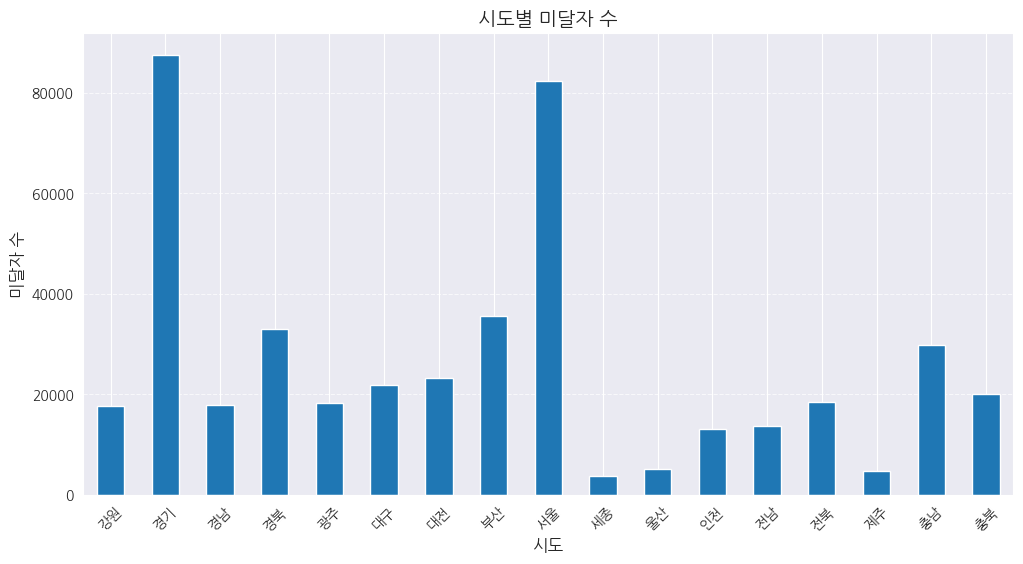

In [18]:
df_grouped = df_selected.groupby("시도")["입학정원"].sum()

plt.figure(figsize=(12, 6))
df_grouped.plot(kind="bar")

plt.xlabel("시도", fontsize=12)
plt.ylabel("미달자 수", fontsize=12)
plt.title("시도별 미달자 수", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [21]:
def process_university_data(file_path):
    """
    주어진 Excel 파일에서 대학 관련 데이터를 가공하여 미달자 수를 포함한 데이터프레임을 반환하는 함수.

    Parameters:
        file_path (str): 엑셀 파일 경로

    Returns:
        pd.DataFrame: 가공된 데이터프레임
    """
    # 엑셀 파일 읽기
    df = pd.read_excel(file_path, engine="openpyxl")

    # 데이터 필터링
    df = df[df["학제"].isin(["대학", "전문대학", "교육대학"])]
    df = df[df["구분"].isin(["학부"])]
    df = df[df["행정구역"] != "소계"]
    
    # 필요한 컬럼 선택 및 이름 변경
    df_selected = df[["시도", "행정구역", "학교수", "학과수", "재적학생수", "입학정원", "입학자"]]
    df_selected = df_selected.rename(columns={
        "재적학생수.1": "재적학생수"
    })
    cols_to_replace = ["시도", "행정구역", "학교수", "학과수", "재적학생수", "입학정원", "입학자"]
    df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)
    
    # 미달자 수 계산 (모집인원 - 입학자)
    df_selected["미달자 수"] = df_selected["입학정원"] - df_selected["입학자"]
    
    
    return df_selected

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/wb/04_q5xcn5d7156lxywm4m_tm0000gn/T/ipykernel_84529/1715801526.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 2021년 데이터 처리 완료!


/var/folders/wb/04_q5xcn5d7156lxywm4m_tm0000gn/T/ipykernel_84529/1715801526.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 2022년 데이터 처리 완료!


/var/folders/wb/04_q5xcn5d7156lxywm4m_tm0000gn/T/ipykernel_84529/1715801526.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 2023년 데이터 처리 완료!


/var/folders/wb/04_q5xcn5d7156lxywm4m_tm0000gn/T/ipykernel_84529/1715801526.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)


✅ 2024년 데이터 처리 완료!
   시도    행정구역  학교수  학과수  재적학생수  입학정원   입학자  미달자 수    연도
0  서울  서울 종로구    2  136  34872  4732  5624   -892  2021
1  서울  서울 종로구    1   46   3226  1127  1364   -237  2021
2  서울   서울 중구    1   91  18822  2685  3126   -441  2021
3  서울   서울 중구    1   41   3587  1460  1575   -115  2021
4  서울  서울 용산구    1   51  12065  2110  2408   -298  2021


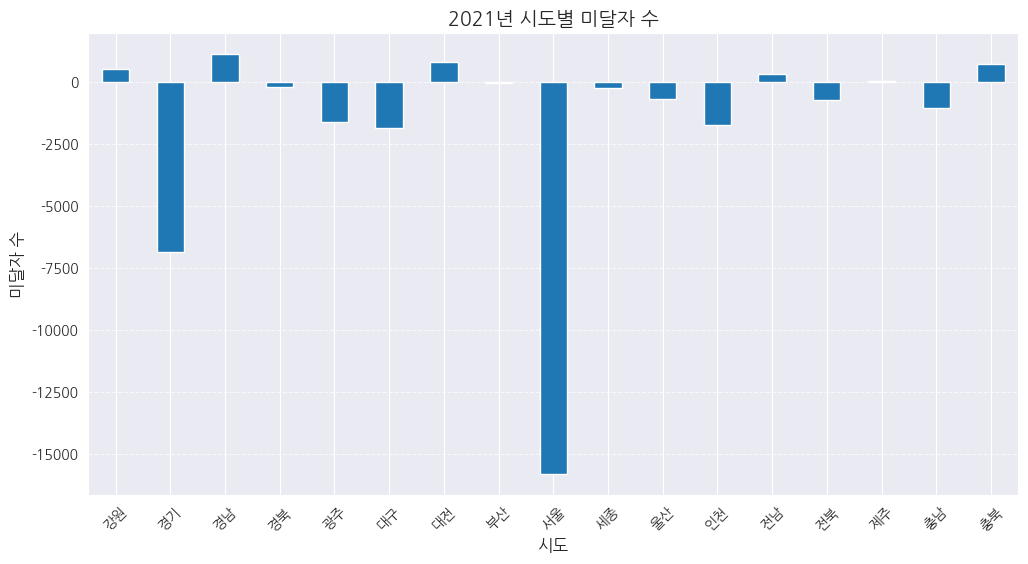

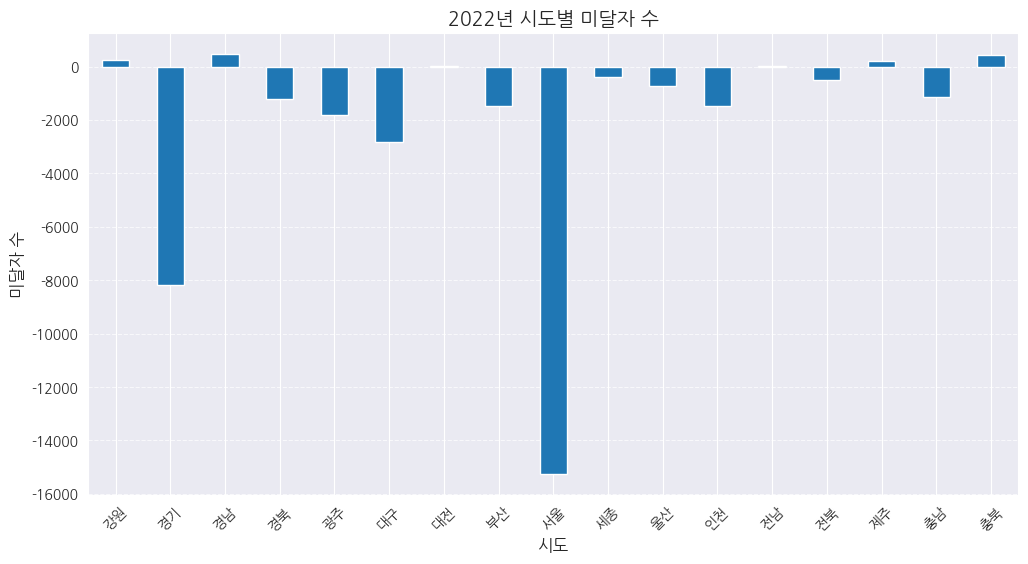

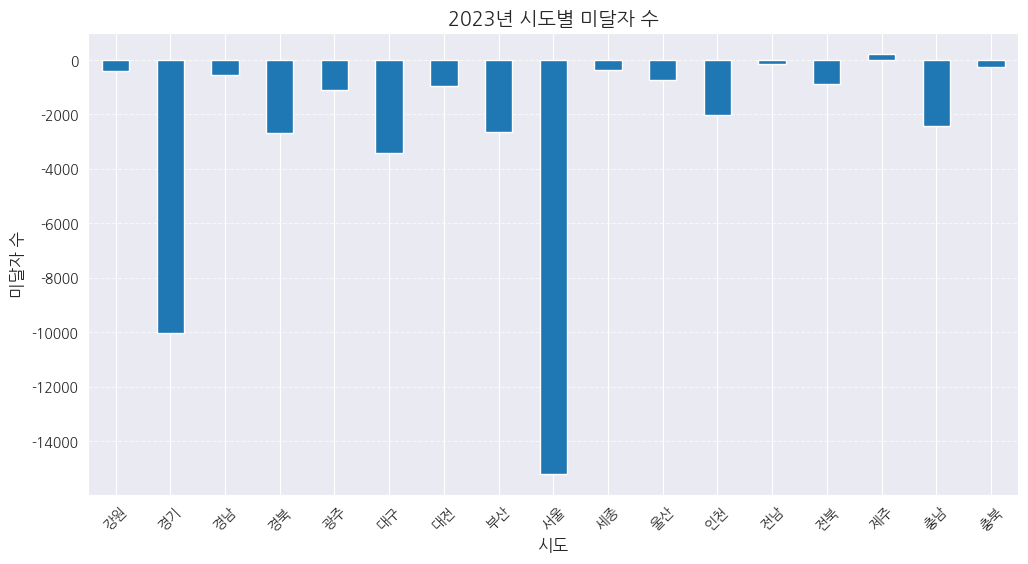

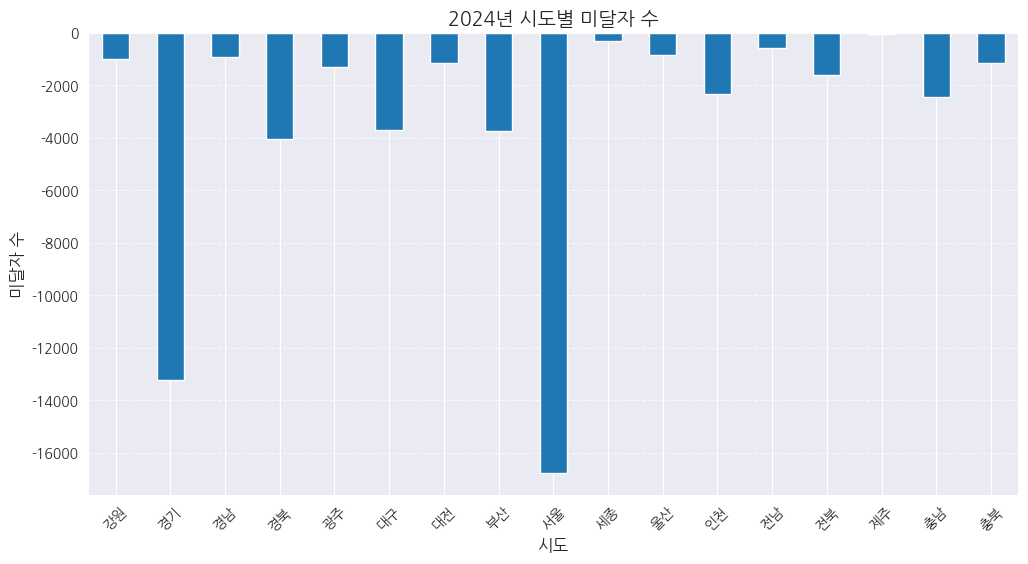

In [62]:
# 기본 파일 경로 (연도 부분만 변경)
base_path = "/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_loss/"

# 연도별 파일명 리스트
years = ["2021", "2022", "2023", "2024"]
file_paths = [f"{base_path}{year}_행정구역별 개황.xlsx" for year in years]

df_list = []

# 각 연도별 파일 처리
for year in years:
    file_path = f"{base_path}{year}_행정구역별 개황.xlsx"  # 연도를 변경하여 파일 경로 생성
    try:
        df_processed = process_university_data(file_path)
        df_processed["연도"] = year  # 연도 컬럼 추가
        df_list.append(df_processed)
        print(f"✅ {year}년 데이터 처리 완료!")
    except Exception as e:
        print(f"⚠️ {year}년 데이터 처리 중 오류 발생: {e}")

# 모든 연도 데이터를 하나의 데이터프레임으로 병합
df_final = pd.concat(df_list, ignore_index=True)

# 데이터 확인
print(df_final.head())  # 데이터 앞부분 출력

# 시도별 미달자 수 시각화
df_grouped = df_final.groupby("시도")["미달자 수"].sum()

for year in years:
    df_year = df_final[df_final["연도"] == year]
    df_grouped = df_year.groupby("시도")["미달자 수"].sum()

    # 그래프 시각화
    plt.figure(figsize=(12, 6))
    df_grouped.plot(kind="bar")

    # 그래프 설정
    plt.xlabel("시도", fontsize=12)
    plt.ylabel("미달자 수", fontsize=12)
    plt.title(f"{year}년 시도별 미달자 수", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # 그래프 출력
    plt.show()

In [65]:
print(df.columns)

Index(['시도', '행정구역', '구분', '학제', '학교수', '학교수.1', '학과수', '재적학생수', '재적학생수.1',
       '재적학생수.2', '전임교원수', '전임교원수.1', '전임교원수.2', '입학정원', '입학자', '입학자.1',
       '입학자.2', '졸업자', '졸업자.1', '졸업자.2', '직원수', '직원수.1', '직원수.2'],
      dtype='object')


In [66]:
total_admissions_per_year = df_final.groupby("연도")["입학자"].sum()

total_admissions_per_year

연도
2021    499877
2022    497405
2023    494312
2024    501568
Name: 입학자, dtype: int64

In [ ]:
df_trend = df_final.groupby(["연도", "시도"])[["학교수"]].sum().reset_index()

plt.figure(figsize=(12, 6))

for sido in df_trend["시도"].unique():
    df_sido = df_trend[df_trend["시도"] == sido]
    plt.plot(df_sido["연도"], df_sido["학교수"], marker='o', linestyle='-', label=sido)

plt.xlabel("연도", fontsize=12)
plt.ylabel("학교수", fontsize=12)
plt.title("연도별 시도별 학교수 변화", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="시도", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

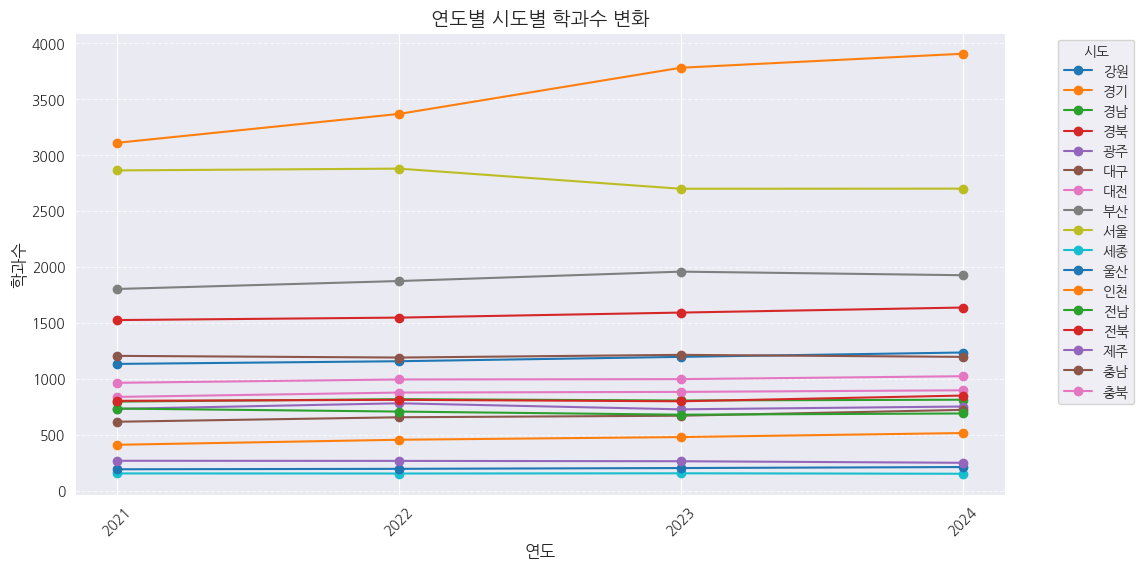

In [41]:
df_trend = df_final.groupby(["연도", "시도"])[["학과수"]].sum().reset_index()

plt.figure(figsize=(12, 6))

for sido in df_trend["시도"].unique():
    df_sido = df_trend[df_trend["시도"] == sido]
    plt.plot(df_sido["연도"], df_sido["학과수"], marker='o', linestyle='-', label=sido)

plt.xlabel("연도", fontsize=12)
plt.ylabel("학과수", fontsize=12)
plt.title("연도별 시도별 학과수 변화", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="시도", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

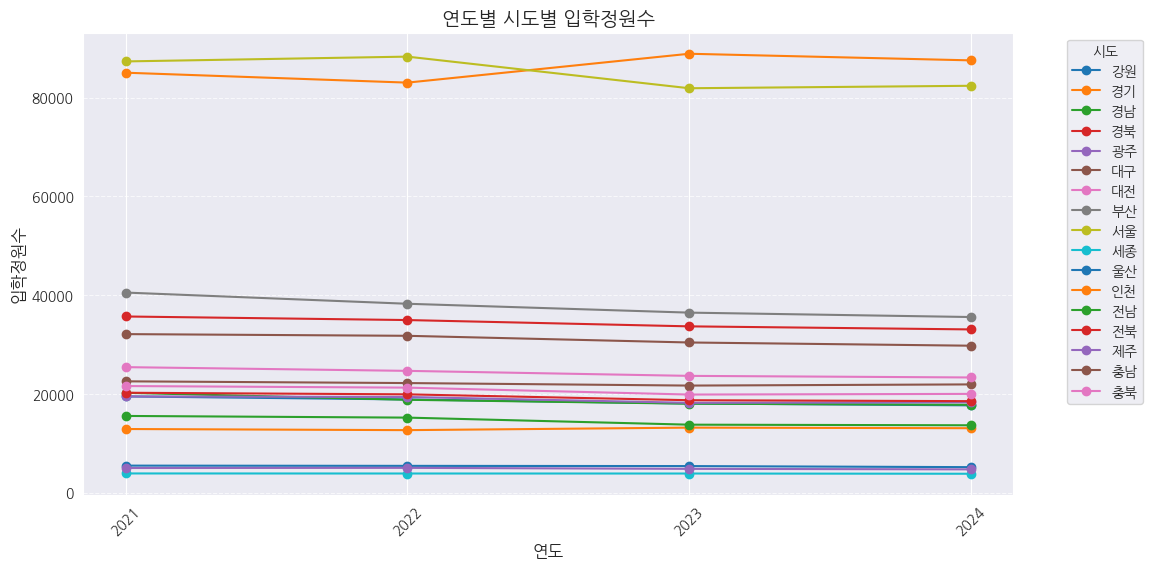

In [42]:
df_trend = df_final.groupby(["연도", "시도"])[["입학정원"]].sum().reset_index()

plt.figure(figsize=(12, 6))

for sido in df_trend["시도"].unique():
    df_sido = df_trend[df_trend["시도"] == sido]
    plt.plot(df_sido["연도"], df_sido["입학정원"], marker='o', linestyle='-', label=sido)

plt.xlabel("연도", fontsize=12)
plt.ylabel("입학정원수", fontsize=12)
plt.title("연도별 시도별 입학정원수", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="시도", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

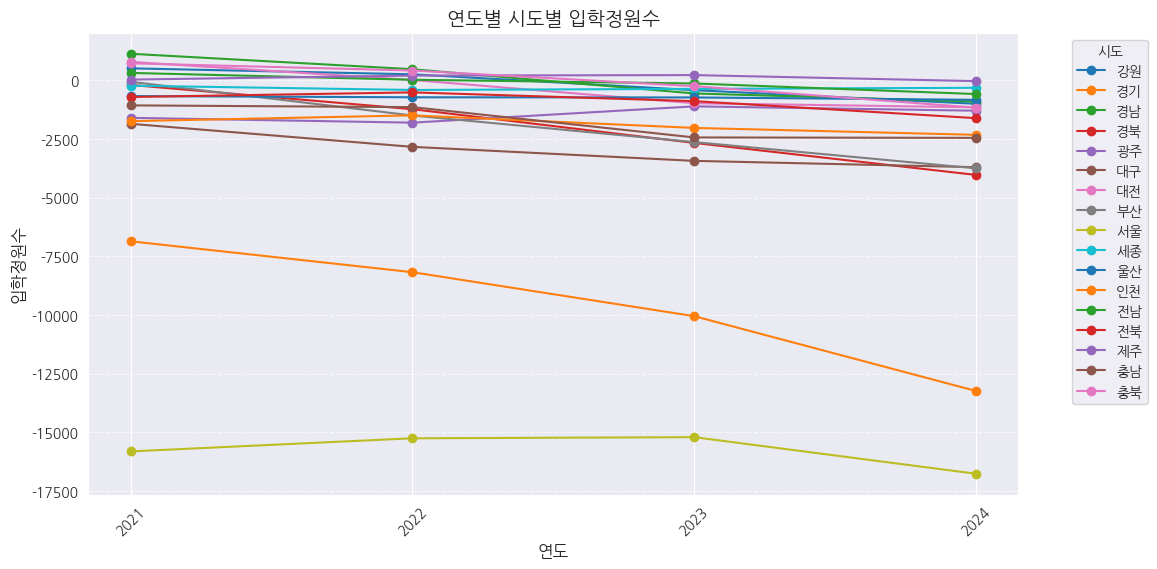

In [46]:
df_trend = df_final.groupby(["연도", "시도"])[["미달자 수"]].sum().reset_index()

plt.figure(figsize=(12, 6))

for sido in df_trend["시도"].unique():
    df_sido = df_trend[df_trend["시도"] == sido]
    plt.plot(df_sido["연도"], df_sido["미달자 수"], marker='o', linestyle='-', label=sido)

plt.xlabel("연도", fontsize=12)
plt.ylabel("입학정원수", fontsize=12)
plt.title("연도별 시도별 입학정원수", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="시도", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

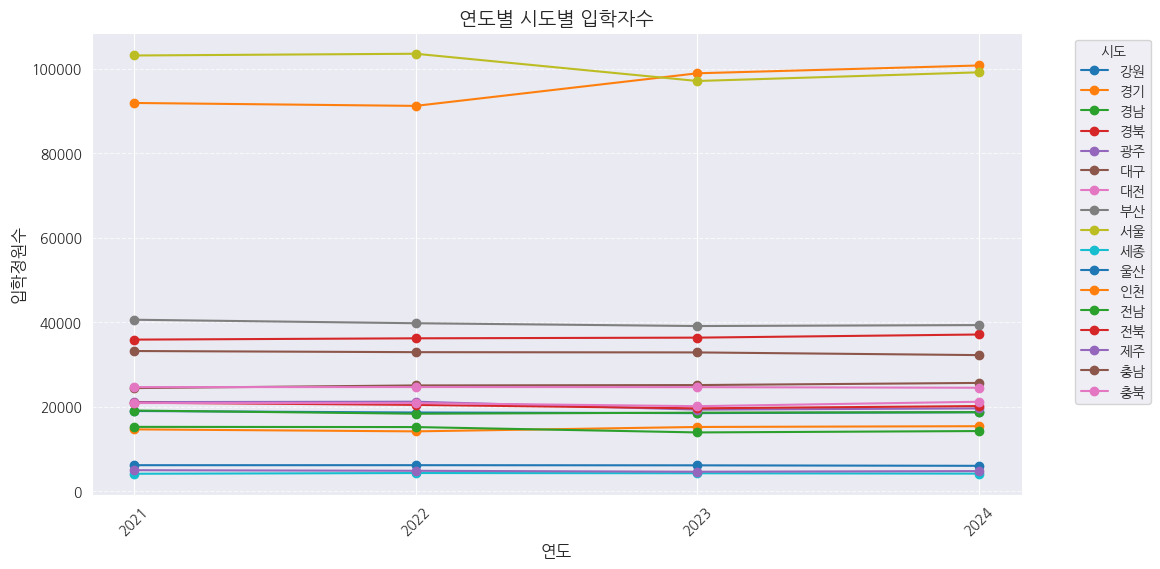

In [49]:
plt.show()
df_trend = df_final.groupby(["연도", "시도"])[["입학자"]].sum().reset_index()

plt.figure(figsize=(12, 6))

for sido in df_trend["시도"].unique():
    df_sido = df_trend[df_trend["시도"] == sido]
    plt.plot(df_sido["연도"], df_sido["입학자"], marker='o', linestyle='-', label=sido)

plt.xlabel("연도", fontsize=12)
plt.ylabel("입학정원수", fontsize=12)
plt.title("연도별 시도별 입학자수", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="시도", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

In [52]:
import ace_tools_open as tools
if "df_final" in globals():
    df_school_count = df_final.groupby(["연도", "시도"])[["학교수"]].sum().reset_index()
    df_school_count.rename(columns={"행정구역": "학교수"}, inplace=True)

    df_pivot = df_school_count.pivot(index="시도", columns="연도", values="학교수").reset_index()

    # 컬럼 이름 정리
    df_pivot.columns.name = None  # 컬럼 이름 제거
    df_pivot = df_pivot.rename_axis(None, axis=1)  # 인덱스 이름 제거

    tools.display_dataframe_to_user(name="연도별 시도별 학교 수", dataframe=df_pivot)
else:
    print("⚠️ df_final이 정의되지 않았습니다. 데이터를 먼저 로드하세요.")

연도별 시도별 학교 수


In [56]:
if "df_final" in globals():
    df_school_count = df_final.groupby(["연도", "시도"])[["학과수"]].sum().reset_index()
    df_school_count.rename(columns={"행정구역": "학과수"}, inplace=True)

    df_pivot = df_school_count.pivot(index="시도", columns="연도", values="학과수").reset_index()

    # 컬럼 이름 정리
    df_pivot.columns.name = None  # 컬럼 이름 제거
    df_pivot = df_pivot.rename_axis(None, axis=1)  # 인덱스 이름 제거

    tools.display_dataframe_to_user(name="연도별 시도별 학교 수", dataframe=df_pivot)
else:
    print("⚠️ df_final이 정의되지 않았습니다. 데이터를 먼저 로드하세요.")

연도별 시도별 학교 수


In [60]:

# df_final이 존재하는지 확인 후 실행
if "df_final" in globals():
    # 연도별 시도별 학교 수 계산    
    df_school_count = df_final.groupby(["연도"])[["입학자"]].sum().reset_index()
    df_school_count.rename(columns={"행정구역": "입학자"}, inplace=True)

    # 데이터를 피벗 테이블 형식으로 변환
    df_pivot = df_school_count.pivot( columns="연도", values="입학자").reset_index()

    # 컬럼 이름 정리
    df_pivot.columns.name = None  # 컬럼 이름 제거
    df_pivot = df_pivot.rename_axis(None, axis=1)  # 인덱스 이름 제거

    # 데이터프레임 표시
    tools.display_dataframe_to_user(name="연도별 시도별 학교 수", dataframe=df_pivot)
else:
    print("⚠️ df_final이 정의되지 않았습니다. 데이터를 먼저 로드하세요.")


연도별 시도별 학교 수


In [58]:
df_school_count = df_final.groupby(["연도"])[["입학자"]].sum().reset_index()

In [55]:
if "df_final" in globals():
    df_school_count = df_final.groupby(["연도", "시도"])[["입학정원"]].sum().reset_index()
    df_school_count.rename(columns={"행정구역": "입학정원"}, inplace=True)

    df_pivot = df_school_count.pivot(index="시도", columns="연도", values="입학정원").reset_index()

    df_pivot.columns.name = None 
    df_pivot = df_pivot.rename_axis(None, axis=1) 

    # 데이터프레임 표시
    tools.display_dataframe_to_user(name="연도별 시도별 학교 수", dataframe=df_pivot)
else:
    print("⚠️ df_final이 정의되지 않았습니다. 데이터를 먼저 로드하세요.")

연도별 시도별 학교 수


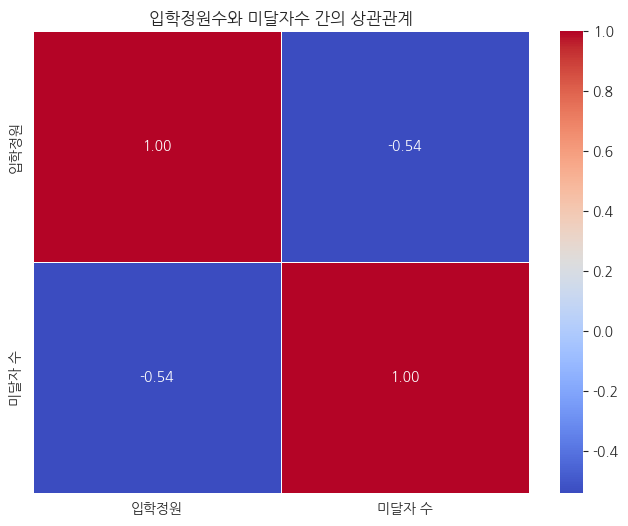

In [47]:
import seaborn as sns
if "df_final" in globals():
    # 상관관계 분석을 위한 데이터 선택
    df_corr = df_final[["입학정원" , "미달자 수"]]

    # 상관 행렬 계산
    corr_matrix = df_corr.corr()

    # 상관 행렬 히트맵 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("입학정원수와 미달자수 간의 상관관계")
    plt.show()
else:
    print("⚠️ df_final이 정의되지 않았습니다. 데이터를 먼저 로드하세요.")

In [73]:
def process_university_data_final(file_path):
    """
    주어진 Excel 파일에서 대학 관련 데이터를 가공하여 미달자 수를 포함한 데이터프레임을 반환하는 함수.

    Parameters:
        file_path (str): 엑셀 파일 경로

    Returns:
        pd.DataFrame: 가공된 데이터프레임
    """
    # 엑셀 파일 읽기
    df = pd.read_excel(file_path, engine="openpyxl")

    # 데이터 필터링
    df = df[df["학제"].isin(["대학", "전문대학", "교육대학"])]
    df = df[df["구분"].isin(["학부"])]
    df = df[df["행정구역"] != "소계"]
    
    # 필요한 컬럼 선택 및 이름 변경
    df_selected = df[["시도", "행정구역", "입학자", "입학정원"]]
    df_selected = df_selected.rename(columns={
        "입학자": "입학자수", 
        "행정구역": "행정구"
    })
    cols_to_replace = ["시도", "행정구", "입학자수", "입학정원"]
    df_selected[cols_to_replace] = df_selected[cols_to_replace].replace("-", 0)
    
    return df_selected

In [74]:
base_path = "/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_loss/"

# 연도별 파일명 리스트
years = ["2021", "2022", "2023", "2024"]
file_paths = [f"{base_path}{year}_행정구역별 개황.xlsx" for year in years]

df_list = []

# 각 연도별 파일 처리
for year in years:
    file_path = f"{base_path}{year}_행정구역별 개황.xlsx"  # 연도를 변경하여 파일 경로 생성
    try:
        df_processed = process_university_data_final(file_path)
        df_processed["연도"] = year  # 연도 컬럼 추가
        df_list.append(df_processed)
        print(f"✅ {year}년 데이터 처리 완료!")
    except Exception as e:
        print(f"⚠️ {year}년 데이터 처리 중 오류 발생: {e}")

# 모든 연도 데이터를 하나의 데이터프레임으로 병합
df_final = pd.concat(df_list, ignore_index=True)

# 데이터 확인
print(df_final.head())  # 데이터 앞부분 출력

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 2021년 데이터 처리 완료!
✅ 2022년 데이터 처리 완료!


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 2023년 데이터 처리 완료!
✅ 2024년 데이터 처리 완료!
   시도     행정구  입학자수  입학정원    연도
0  서울  서울 종로구  5624  4732  2021
1  서울  서울 종로구  1364  1127  2021
2  서울   서울 중구  3126  2685  2021
3  서울   서울 중구  1575  1460  2021
4  서울  서울 용산구  2408  2110  2021


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [75]:
df_final["행정구"] = df_final.apply(
    lambda row: row["행정구"].replace(row["시도"] + " ", "") if row["시도"] in row["행정구"] else row["행정구"], 
    axis=1
)

In [76]:
print(df_final.head())

   시도  행정구  입학자수  입학정원    연도
0  서울  종로구  5624  4732  2021
1  서울  종로구  1364  1127  2021
2  서울   중구  3126  2685  2021
3  서울   중구  1575  1460  2021
4  서울  용산구  2408  2110  2021


In [78]:
df_final.to_excel("/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_loss/2021-2024.xlsx", index=False)